# Mentoring 2 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. **THIS DATA IS SCRAPED FROM LAMUDI**. YOU ARE **PROHIBITED** TO USE THIS DATA OUTSIDE PACMANN MENTORING.
6. Submit your result to the submission form

## Dataset Description
---

**Note**

- This dataset is scraped from [Lamudi](https://www.lamudi.co.id/)
- We perform several edit for this mentoring purposes. So, please use the dataset from [here](https://drive.google.com/file/d/109ZcOSllPPWCETc01tXiI3Fx8BWRU-32/view?usp=sharing).


**Description**
- We're looking to predict the rent price of a house
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`name`|`str`|The name (title) of a house|
|`url`|`str`|The house url|
|`bedrooms`|`int`|The number of bedrooms|
|`bathrooms`|`int`|The number of bathrooms|
|`floors`|`int`|The number of floors|
|`land_area`|`float`|The area of land in m2|
|`building_area`|`float`|The building area in m2|
|`longitude`|`float`|The house longitude coordinate in degree|
|`latitude`|`float`|The house latitude coordinate in degree|
| `price` | `int` | The yearly rent price (IDR) , (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
5. Lets Explore
```

### 1. Import data to Python (5 pts)
---

In [1]:
####################################################
# Import Numpy and Pandas library
# Write your code here
# 1 pts
####################################################
import numpy as np
import pandas as pd

# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

/var/folders/t3/fw9vwjtx1nx7g5w7l0fsjtw80000gp/T/ipykernel_94415/4051023710.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `url`, keep the last ones
# - Drop col `names` and `url`
# - Print the data shape
# - Return the dataset
# Write your code here (4 pts)
####################################################
def read_data(fname):
    """ 
    This function for import data into pandas dataframe,
    for later to be trained into a model Machine Learning

    Candra Kurniawan | Pacmann AI 2024.
    
    """
    # Import the data from local computer into dataframe

    # mencari file dengan kata belakang .xlsx
    if fname.endswith('.xlsx'):
        df = pd.read_excel(fname)

    # mencari file dengan kata belakang .csv
    elif fname.endswith('.csv'):
        df = pd.read_csv(fname, sep = ',')

    # jika tidak ada file xlsx dan csv maka akan Raise Error
    else:
        raise ValueError(f"File tidak ditemukan {fname} harus berbentuk .xlsx atau .csv")
    
    # detect duplicates data from collumn and remove it (drop)
    df = df.drop_duplicates(subset=['url'], keep='last')

    # Drop the 'name' column and set index into column url
    df.drop(columns=['name'], inplace=True)
    df.set_index('url', inplace=True)

    return df

In [3]:
# Read the Uber data (JUST RUN THE CODE)
data = read_data(fname='scrape_house_edit.csv')

In [4]:
# JUST RUN THE CODE
data.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
url,,,,,,,,
https://www.lamudi.co.id/rumah-sewa-siap-huni-taman-kopo-indah-1-dekat-tol-169958216940.html,2.0,2.0,1.0,135.0,92.0,107.564840,-6.967360,35000000.0
https://www.lamudi.co.id/sewa-rumah-bandung-andaru-170356728824.html,2.0,1.0,1.0,60.0,55.0,107.687423,-6.938851,25000000.0
https://www.lamudi.co.id/disewakan-rumah-siap-huni-furnished-terusan-buah-b-16938872774.html,4.0,3.0,1.0,210.0,150.0,107.621282,-6.954875,60000000.0
https://www.lamudi.co.id/disewakan-rumah-1-lantai-dalam-komplek-tki-taman-k-169102747823.html,2.0,2.0,1.0,153.0,120.0,106.904854,-6.653733,50000000.0
https://www.lamudi.co.id/for-rent-rumah-minimalis-di-ciganitri-bojongsoang-16930131581.html,4.0,2.0,1.0,93.0,72.0,107.633610,-6.980560,43000000.0


In [5]:
# data shape
data.shape

(1490, 8)

### 2. Data Preprocessing (22 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Remove & Preprocess Anomalous Data
2.4 Numerical Imputation
2.5 Feature Engineering the Data
2.6 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (3 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [6]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################

def split_input_output(data, target_col):
    """  
    This function for splitting data into input for train data (X) 
    and output for target/predict data (y).

    Specs : -> has two arguments
                1. data (pd.DataFrame)
                2. target_col (column pandas)
            -> Print the data.shape after splitting
            -> Then, Returning the value of X and y
    """
    # Splitting the data into input (X) and output (y)
    X = data.drop(target_col, axis = 1)
    y = data[target_col]

    # Print the shape of the data after splitting
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    return X, y

In [7]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='price')

X shape: (1490, 7)
y shape: (1490,)


In [8]:
X.head()  # (JUST RUN THE CODE)

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/rumah-sewa-siap-huni-taman-kopo-indah-1-dekat-tol-169958216940.html,2.0,2.0,1.0,135.0,92.0,107.564840,-6.967360
https://www.lamudi.co.id/sewa-rumah-bandung-andaru-170356728824.html,2.0,1.0,1.0,60.0,55.0,107.687423,-6.938851
https://www.lamudi.co.id/disewakan-rumah-siap-huni-furnished-terusan-buah-b-16938872774.html,4.0,3.0,1.0,210.0,150.0,107.621282,-6.954875
https://www.lamudi.co.id/disewakan-rumah-1-lantai-dalam-komplek-tki-taman-k-169102747823.html,2.0,2.0,1.0,153.0,120.0,106.904854,-6.653733
https://www.lamudi.co.id/for-rent-rumah-minimalis-di-ciganitri-bojongsoang-16930131581.html,4.0,2.0,1.0,93.0,72.0,107.633610,-6.980560


In [9]:
y.head()  # (JUST RUN THE CODE)

url
https://www.lamudi.co.id/rumah-sewa-siap-huni-taman-kopo-indah-1-dekat-tol-169958216940.html     35000000.0
https://www.lamudi.co.id/sewa-rumah-bandung-andaru-170356728824.html                             25000000.0
https://www.lamudi.co.id/disewakan-rumah-siap-huni-furnished-terusan-buah-b-16938872774.html     60000000.0
https://www.lamudi.co.id/disewakan-rumah-1-lantai-dalam-komplek-tki-taman-k-169102747823.html    50000000.0
https://www.lamudi.co.id/for-rent-rumah-minimalis-di-ciganitri-bojongsoang-16930131581.html      43000000.0
Name: price, dtype: float64

#### 2.2. Train-Valid-Test Split (3 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [10]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################

def split_train_test(X, y, test_size, seed):
    """  
    This function for splitting the input and output data into
    Training, validation, and test dataset.

    Specs : -> Has four arguments:
                1. X = the input (pd.DataFrame)
                2. y = the output (pd.DataFrame)
                3. test_size = the test size between 0 - 1 (float)
                4. seed = the random state (int)
            -> Print the data shape after splitting
            -> Then return the X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = seed)
    return X_train, X_test, y_train, y_test


In [11]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, 0.2, 123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, 0.5, 123)

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_not_train.shape}")
print(f"y test shape: {y_not_train.shape}")
print('')
print(f"X valid shape: {X_valid.shape}")
print(f"y valid shape: {y_valid.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (1192, 7)
y train shape: (1192,)
X test shape: (298, 7)
y test shape: (298,)

X valid shape: (149, 7)
y valid shape: (149,)
X test shape: (149, 7)
y test shape: (149,)


In [12]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.8
0.1
0.1


In [13]:
X_train.head()  # (JUST RUN THE CODE)

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [14]:
100 * (X_train.isna().sum(0) / len(X_train))

bedrooms         4.194631
bathrooms        4.446309
floors           4.614094
land_area        5.369128
building_area    4.697987
longitude        0.419463
latitude         0.419463
dtype: float64

- We will impute all these variables if there is any missing value

- First, check the features distribution

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

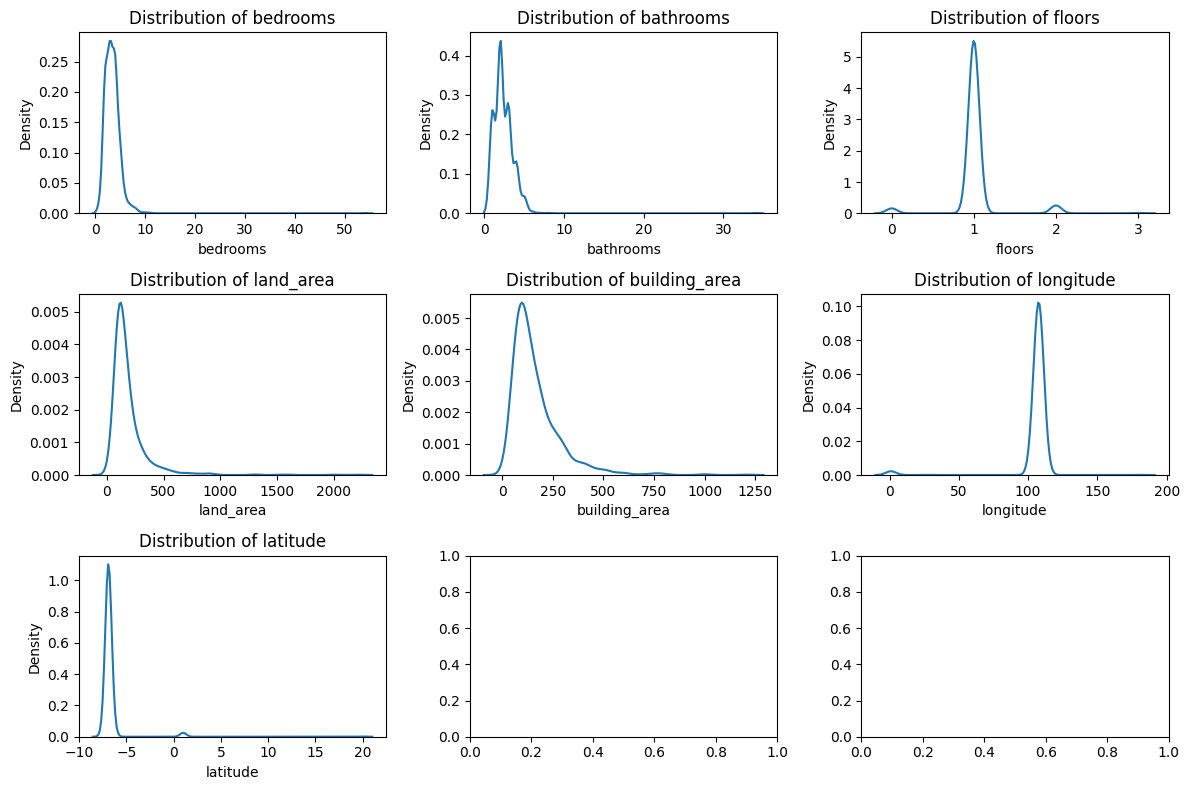

In [16]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train.columns):
    sns.kdeplot(X_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Summary:
- Our data obviously have anomalies, e.g.
  - there's no such thing of 50 `floors` for family-sized house, or
  - 30 bathrooms, or
  - (`longitude`, `latitude`) = (`0`, `0`) are not even in Indonesia.
- We have to clean the data from this anomalies
- We can assume that our numerical data have a skewed distribution, thus we'll use median to imput the missing values.

In [17]:
X_train.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1142.000000,1139.000000,1137.000000,1128.000000,1136.000000,1187.000000,1187.000000
mean,3.466725,2.396839,1.019349,186.466312,164.384683,105.351897,-6.711368
std,2.005740,1.444531,0.274462,168.919119,122.173535,15.629363,1.380850
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-7.561604
25%,2.000000,2.000000,1.000000,105.000000,90.000000,107.580215,-6.948904
50%,3.000000,2.000000,1.000000,136.500000,126.000000,107.619047,-6.917247
75%,4.000000,3.000000,1.000000,200.000000,200.000000,107.640830,-6.863551
max,54.000000,34.000000,3.000000,2216.000000,1200.000000,180.000000,20.000000


- Let's find the cut-off value of each features

In [18]:
# this is the anomaly (check it by yourself)
X_train[X_train['bedrooms']>11]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewakan-rumah-siap-huni-pondok-hijau-bandung-uta-168321463721.html,54.0,4.0,2.0,185.0,180.0,107.58247,-6.86157


In [19]:
# this is the anomaly (check it by yourself)
X_train[X_train['bathrooms']>8]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/sewa-murah-rumah-modern-dlm-cluster-di-kota-baru-p-169927672061.html,4.0,34.0,1.0,126.0,175.0,107.467209,-6.844347


In [20]:
# This is anomalous
# We can set this and replace it with 1
X_train[X_train['floors']<1]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-tki-v-dalam-cluster-siap-huni-169565454097.html,2.0,1.0,0.0,114.0,51.0,107.380280,-6.821670
https://www.lamudi.co.id/rumah-di-sayap-dago-bandung-utara-169769007720.html,1.0,1.0,0.0,450.0,300.0,107.623445,-6.876258
https://www.lamudi.co.id/rumah-siap-pakai-di-komplek-kota-baru-parahyangan-169769003065.html,4.0,3.0,0.0,306.0,250.0,107.467209,-6.844347
https://www.lamudi.co.id/rumah-modern-full-renov-daerah-tki-v.html,2.0,1.0,0.0,96.0,70.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-tinggal-cantik-daerah-hegarmanah.html,4.0,4.0,0.0,300.0,275.0,107.601390,-6.881670
https://www.lamudi.co.id/rumah-taman-kopo-indah-3-169769001293.html,1.0,1.0,0.0,500.0,400.0,108.251589,-6.387806
https://www.lamudi.co.id/sewa-rumah-minimalis-siap-pakai-komplek-muara-saya-169769007831.html,4.0,2.0,0.0,110.0,NaN,107.621282,-6.954875
https://www.lamudi.co.id/rumah-sangat-strategis-di-mekar-wangi-mainroad.html,3.0,3.0,0.0,300.0,350.0,107.603277,-6.951883
https://www.lamudi.co.id/turun-harga-rumah-komplek-kamandaka-kota-baru-para-169571884645.html,4.0,3.0,0.0,378.0,NaN,107.467209,-6.844347


In [21]:
len(X_train[X_train['floors']<1])

30

In [22]:
# this is the anomaly (check it by yourself)
X_train[X_train['land_area']>1_700]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/rumah-kembar-strategis-dekat-jalan-utama-bkr-bandu-169790695311.html,5.0,3.0,1.0,2000.0,250.0,108.388860,-7.365351
https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html,5.0,5.0,1.0,2216.0,600.0,107.618573,-6.863551


In [23]:
# this is the anomaly (check it by yourself)
X_train[X_train['building_area']>1_000]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html,8.0,5.0,1.0,899.0,1200.0,107.610171,-6.906996


In [24]:
X_train[X_train['building_area'] < 1]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-singgasana-pradana-jalan-besar-siap-huni-169563876727.html,4.0,NaN,1.0,180.0,0.0,107.621282,-6.954875


In [25]:
# The anomaly tambahan opsi drop index 6 dan 7
# tambahan
X_train[X_train['land_area']<1]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/di-sewakan-rumah-baru-sayap-pasteur-jalan-sukawarn-169458447044.html,6.0,6.0,1.0,0.0,235.0,107.607608,-6.890485
https://www.lamudi.co.id/disewakan-rumah-nyaman-sayap-gatsu-bandung-minimal-16956390412.html,8.0,5.0,1.0,0.0,NaN,107.636076,-6.927541


In [26]:
# The anomaly tambahan
# tambahan
X_train[X_train['bathrooms'].isnull()]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-town-house-selangkah-ke-pintu-tol-pasteu-169518161162.html,4.0,NaN,1.0,105.0,210.0,107.566104,-6.889209
https://www.lamudi.co.id/disewakan-rumah-setiabudhi-regency-169985200459.html,4.0,NaN,1.0,250.0,220.0,107.596224,-6.862306
https://www.lamudi.co.id/rumah-dekat-rs-hermina-2-dan-cicaheum-170115999531.html,NaN,NaN,1.0,110.0,110.0,107.664357,-6.904819
https://www.lamudi.co.id/disewakan-rumah-di-mekar-wangi-bandung-kota-16984007147.html,2.0,NaN,1.0,120.0,90.0,107.610560,-6.957220
https://www.lamudi.co.id/rumah-cipaganti-graha-ciwastra-bandung-16998662914.html,5.0,NaN,NaN,225.0,200.0,107.624440,-6.811670
https://www.lamudi.co.id/disewa-rumah-siap-huni-nyaman-terawat-di-sanggar-h-169760438844.html,3.0,NaN,1.0,180.0,140.0,107.648968,-6.943102
https://www.lamudi.co.id/rumah-baru-di-podomoro-park-buah-batu-bandung-169400785393.html,2.0,NaN,1.0,66.0,42.0,107.621282,-6.954875
https://www.lamudi.co.id/rumah-minimalis-taman-holis-indah-170234067491.html,3.0,NaN,1.0,135.0,90.0,107.557241,-6.942272


In [27]:
# Check for outliers
cond = y_train > 600_000_000
y_train.index.values[y_train > 600_000_000]

# We will exclude this, these houses are too expensive

array(['https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html',
       'https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html',
       'https://www.lamudi.co.id/sewa-dago-mainroad-169693284441.html',
       'https://www.lamudi.co.id/mainroad-sukajadi-pasteur-sewa-rumah-di-bandung-ut-169458409481.html'],
      dtype=object)

In [28]:
# this is the anomaly (check it by yourself)
X_train[X_train['longitude']<=1.0]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/sewa-rumah-megaraya-sayap-pasteur-169873821723.html,3.0,2.0,1.0,265.0,70.0,1.0,1.0
https://www.lamudi.co.id/rumah-siap-huni-hoek-di-komplek-muara-bandung-170238251288.html,3.0,2.0,1.0,285.0,400.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-singgasana-pradana-bandung-170263850870.html,5.0,3.0,1.0,198.0,130.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-cantik-kbp-169873965115.html,3.0,NaN,1.0,144.0,74.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-muara-baru-kota-bandung-170238285332.html,NaN,NaN,1.0,114.0,122.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-lux-citra-antapani-169995077454.html,4.0,4.0,1.0,287.0,300.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-minimalis-modern-di-citra-green-da-170229570673.html,4.0,4.0,1.0,264.0,244.0,1.0,1.0
https://www.lamudi.co.id/disewa-rumah-di-komplek-perumahan-melong-asih-rege-169873971591.html,4.0,2.0,1.0,98.0,170.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-minimalis-modern-di-citra-green-da-17026384894.html,4.0,4.0,1.0,264.0,244.0,1.0,1.0


- We know that the house is real, but the coordinate is not.
- We can trait the non-Indonesian coordinate as missing values

- Next, explore the `price`

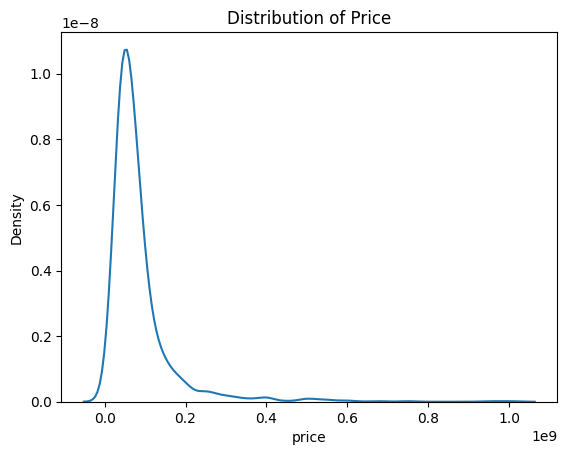

In [29]:
sns.kdeplot(y_train)
plt.title(f'Distribution of Price')
plt.show()

In [30]:
# Check for outliers
cond = y_train > 600_000_000
pd.concat((X_train[cond], y_train[cond]), axis=1)

# We will exclude this, these houses are too expensive

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
url,,,,,,,,
https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html,8.0,5.0,1.0,899.0,1200.0,107.610171,-6.906996,1.000000e+09
https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html,5.0,5.0,1.0,2216.0,600.0,107.618573,-6.863551,7.500000e+08
https://www.lamudi.co.id/sewa-dago-mainroad-169693284441.html,1.0,NaN,1.0,960.0,400.0,107.678621,-6.946481,9.500000e+08
https://www.lamudi.co.id/mainroad-sukajadi-pasteur-sewa-rumah-di-bandung-ut-169458409481.html,5.0,4.0,1.0,799.0,400.0,107.586670,-6.898330,6.750000e+08


- Explore the relation between features and `price`

In [31]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
url,,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670,47500000.0
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330,20000000.0
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875,79000000.0
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670,150000000.0
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220,135000000.0


In [32]:
# Create a heatmap
# Get the correlation matrix
corr = train_data.corr()
corr

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
bedrooms,1.000000,0.358414,0.098568,0.210908,0.314938,-0.018271,0.027856,0.213710
bathrooms,0.358414,1.000000,0.052360,0.252649,0.411306,-0.031933,0.015465,0.309334
floors,0.098568,0.052360,1.000000,-0.007668,0.050838,-0.053794,0.044919,-0.002645
land_area,0.210908,0.252649,-0.007668,1.000000,0.682693,-0.040833,0.061068,0.693078
building_area,0.314938,0.411306,0.050838,0.682693,1.000000,-0.070606,0.079159,0.713262
longitude,-0.018271,-0.031933,-0.053794,-0.040833,-0.070606,1.000000,-0.887063,-0.070362
latitude,0.027856,0.015465,0.044919,0.061068,0.079159,-0.887063,1.000000,0.065045
price,0.213710,0.309334,-0.002645,0.693078,0.713262,-0.070362,0.065045,1.000000


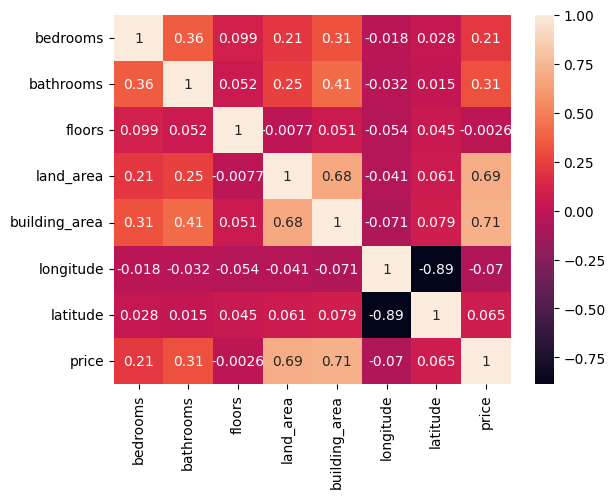

In [33]:
# Plot the heatmap
sns.heatmap(corr, annot=True)
plt.show()

- We can see, features `bedrooms`, `bathrooms`, `land_area`, and `building_area` have high correlation with `price`.

**Conclusion for preprocessing**
- First, remove the data from anomalous data
- Then, generate imputer.

#### 2.3. Remove & Preprocess Anomalous Data (6 pts)
---

- Let's remove our data from anomalous.
- Please see the EDA to help you remove the anomalous data

In [34]:
X_train.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1142.000000,1139.000000,1137.000000,1128.000000,1136.000000,1187.000000,1187.000000
mean,3.466725,2.396839,1.019349,186.466312,164.384683,105.351897,-6.711368
std,2.005740,1.444531,0.274462,168.919119,122.173535,15.629363,1.380850
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-7.561604
25%,2.000000,2.000000,1.000000,105.000000,90.000000,107.580215,-6.948904
50%,3.000000,2.000000,1.000000,136.500000,126.000000,107.619047,-6.917247
75%,4.000000,3.000000,1.000000,200.000000,200.000000,107.640830,-6.863551
max,54.000000,34.000000,3.000000,2216.000000,1200.000000,180.000000,20.000000


In [35]:
######################################################################
# Find the data index to drop
# Remember to carefully read the EDA part
# Save the dropped index to idx_to_drop (list of index)
# Write your code here (2 pts)
######################################################################
def index_to_drop(data, data_y):
    """ 
    Function to store data index that will droppped 

    have 2 argument:
    1. data -> X_train
    2. data_y -> y_train

    Candra Kurniawan | Pacmann AI 2024.
    """

    selected_indexes = data.index.values[
        (data['bedrooms'] > 11) | 
        (data['bathrooms'] > 8) | 
        (data['land_area'] > 1700) | 
        (data['building_area'] > 1000) |
        (data['building_area'] < 1) |
        (data['land_area'] < 1) |
        (data_y > 600_000_000)
        ]
   # selected_indexes = data_y.index.values[data_y > 600_000_000]
    
   # print("Number of index to drop:", len(selected_indexes))
    print(selected_indexes)
    
    return selected_indexes


In [36]:
idx_to_drop = index_to_drop(X_train, y_train)

['https://www.lamudi.co.id/sewa-murah-rumah-modern-dlm-cluster-di-kota-baru-p-169927672061.html'
 'https://www.lamudi.co.id/rumah-kembar-strategis-dekat-jalan-utama-bkr-bandu-169790695311.html'
 'https://www.lamudi.co.id/di-sewakan-rumah-baru-sayap-pasteur-jalan-sukawarn-169458447044.html'
 'https://www.lamudi.co.id/disewa-singgasana-pradana-jalan-besar-siap-huni-169563876727.html'
 'https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html'
 'https://www.lamudi.co.id/disewakan-rumah-siap-huni-pondok-hijau-bandung-uta-168321463721.html'
 'https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html'
 'https://www.lamudi.co.id/disewakan-rumah-nyaman-sayap-gatsu-bandung-minimal-16956390412.html'
 'https://www.lamudi.co.id/sewa-dago-mainroad-169693284441.html'
 'https://www.lamudi.co.id/mainroad-sukajadi-pasteur-sewa-rumah-di-bandung-ut-169458409481.html']


In [37]:
# Check the index (JUST RUN THE CODE)
print(f'Number of index to drop:', len(idx_to_drop))
idx_to_drop

Number of index to drop: 10


array(['https://www.lamudi.co.id/sewa-murah-rumah-modern-dlm-cluster-di-kota-baru-p-169927672061.html',
       'https://www.lamudi.co.id/rumah-kembar-strategis-dekat-jalan-utama-bkr-bandu-169790695311.html',
       'https://www.lamudi.co.id/di-sewakan-rumah-baru-sayap-pasteur-jalan-sukawarn-169458447044.html',
       'https://www.lamudi.co.id/disewa-singgasana-pradana-jalan-besar-siap-huni-169563876727.html',
       'https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html',
       'https://www.lamudi.co.id/disewakan-rumah-siap-huni-pondok-hijau-bandung-uta-168321463721.html',
       'https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html',
       'https://www.lamudi.co.id/disewakan-rumah-nyaman-sayap-gatsu-bandung-minimal-16956390412.html',
       'https://www.lamudi.co.id/sewa-dago-mainroad-169693284441.html',
       'https://www.lamudi.co.id/mainroad-sukajadi-pasteur-sewa-rumah-di-bandung-ut-169458409481.html'],
      dtype=object

In [38]:
print(f"Shape original X_train: {X_train.shape}")
print(f"Shape original y_train: {y_train.shape}")

Shape original X_train: (1192, 7)
Shape original y_train: (1192,)


In [39]:
len(X_train[X_train['longitude'] <= 1])

25

In [40]:
X_train.isna().sum()

bedrooms         50
bathrooms        53
floors           55
land_area        64
building_area    56
longitude         5
latitude          5
dtype: int64

- Now, lets drop the data for `X_train` and also `y_train`

In [41]:
######################################################################
# Drop the anomalous data
# Save the dropped data into X_train_dropped and y_train_dropped
# Write your code here (1 pts)
######################################################################

# Drop rows based on index values
X_train_dropped = X_train.drop(idx_to_drop)
y_train_dropped = y_train.drop(idx_to_drop)

print(f"Shape after dropped X_train: {X_train_dropped.shape}")
print(f"Shape after dropped y_train: {y_train_dropped.shape}")

Shape after dropped X_train: (1182, 7)
Shape after dropped y_train: (1182,)


In [42]:
# Validate (JUST RUN THE CODE)
print('Shape of X train after dropped:', X_train_dropped.shape)
X_train_dropped.head()

Shape of X train after dropped: (1182, 7)


,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220


In [43]:
# Validate (JUST RUN THE CODE)
print('Shape of y train after dropped:', y_train_dropped.shape)
y_train_dropped.head()

Shape of y train after dropped: (1182,)


url
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html      47500000.0
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html         20000000.0
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html     79000000.0
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html    150000000.0
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html      135000000.0
Name: price, dtype: float64

- Great!
- Next, we replace the missing `longitude` and `latitude` to `np.nan`
- Please recall the definition of missing `longitude` and `latitude` in the EDA section

In [44]:
len(X_train_dropped[X_train_dropped['land_area'].isna()])

64

In [45]:
X_train_dropped.isna().sum()

bedrooms         50
bathrooms        51
floors           55
land_area        64
building_area    55
longitude         5
latitude          5
dtype: int64

In [46]:
X_train_dropped['longitude'].isna().sum()

5

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
######################################################################
# Replace the missing longitude and latitude to np.nan
# Write your code here (2 pts)
######################################################################

def missing_longitude_latitude(data, column):
    """  
    This function for imputting missing data (NaN)
    inside the longitude and latitude column

    Candra Kurniawan | Pacmann AI 2024.
    """
    # Replace the missing # Replace 0.0 with 1.0 in the specified column
    data[column] = data[column].replace(1.0, np.nan)

    return data


In [49]:
# Performing imputing data into the Missing values (NaN) 
# into columns'longitude' and 'latitude'

X_train_dropped = missing_longitude_latitude(data = X_train_dropped, column = ['longitude','latitude'])


In [50]:
len(X_train_dropped[X_train_dropped['longitude'] <= 1.0])

0

In [51]:
X_train_dropped['longitude'].isna().sum()
X_train_dropped['latitude'].isna().sum()

30

In [52]:
X_train_dropped.isna().sum()

bedrooms         50
bathrooms        51
floors           55
land_area        64
building_area    55
longitude        30
latitude         30
dtype: int64

- Then, replace the `floors` of 0.0 to 1.0

In [53]:
######################################################################
# Replace the 0.0 floors to 1.0
# Write your code here (1 pts)
######################################################################
def missing_floors_1(data, column):
    """  
    This function for fit & transforming data from 0.0 to 1.0
    Column 'floors'

    Has 2 parameter:
    1. data -> X_train_longlat_filled
    2. column -> 'floors'

    return:
    -> data = X_train dataset
    
    Candra Kurniawan | Pacmann AI 2024.
    """
    # make a copy of dataframe for not change the data before
    #processed_data = data.copy()

    # Replace 0.0 with 1.0 in the specified column
    data[column] = data[column].replace(0.0, 1.0)

    return data

In [54]:
X_train_dropped = missing_floors_1(data = X_train_dropped, column = ['floors'])

In [55]:
X_train_dropped.isna().sum()

bedrooms         50
bathrooms        51
floors           55
land_area        64
building_area    55
longitude        30
latitude         30
dtype: int64

In [56]:
X_train_dropped['floors'].isna().sum()

55

In [57]:
len(X_train_dropped[X_train_dropped['floors'] < 1])

0

In [58]:
# Validate (JUST RUN THE CODE)
X_train_dropped.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1132.000000,1131.000000,1127.000000,1118.000000,1127.000000,1152.000000,1152.000000
mean,3.409011,2.355438,1.045253,181.546512,162.645075,107.596271,-6.876679
std,1.320326,1.086976,0.216323,144.018231,117.421369,3.177615,0.803193
min,1.000000,1.000000,1.000000,30.000000,25.000000,28.000000,-7.561604
25%,2.000000,2.000000,1.000000,105.000000,90.000000,107.584720,-6.948904
50%,3.000000,2.000000,1.000000,136.000000,126.000000,107.621282,-6.919270
75%,4.000000,3.000000,1.000000,200.000000,200.000000,107.643880,-6.869759
max,11.000000,8.000000,3.000000,1600.000000,1000.000000,180.000000,20.000000


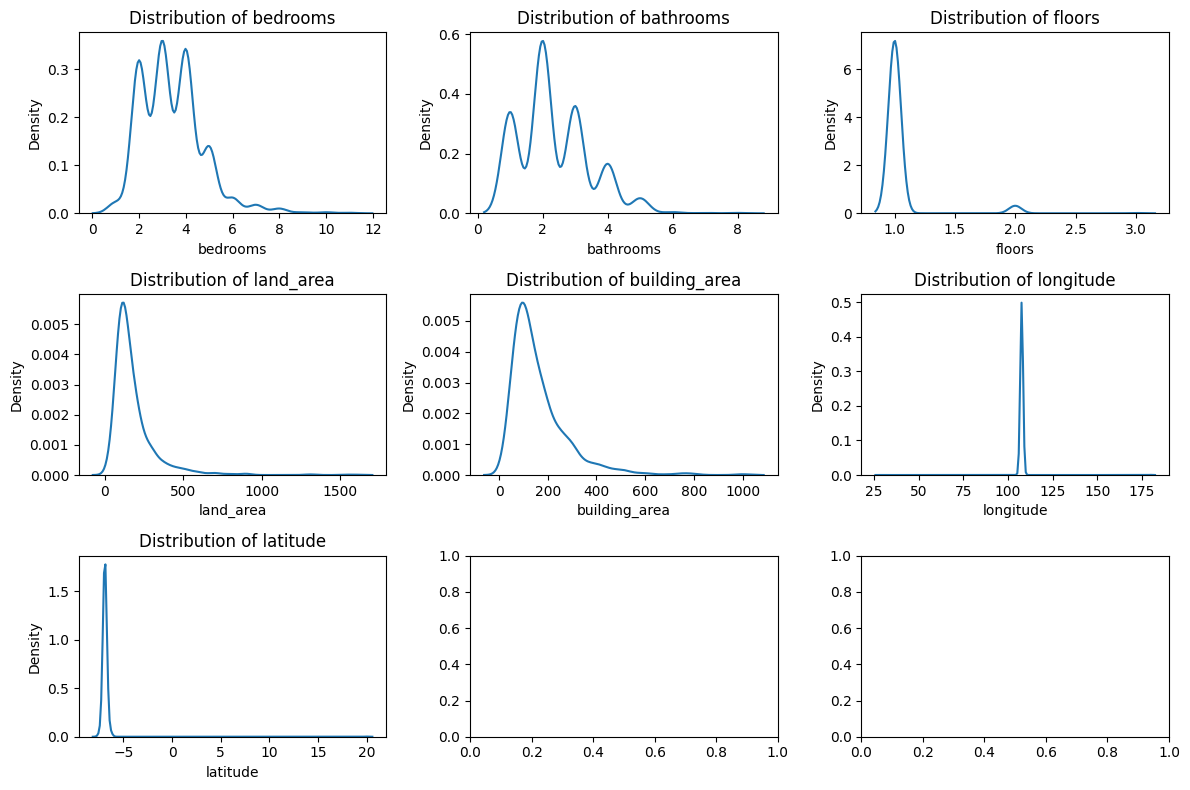

In [59]:
# Yang candra punya
#Plot histogram (JUST RUN THE CODE)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_dropped.columns):
    sns.kdeplot(X_train_dropped[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

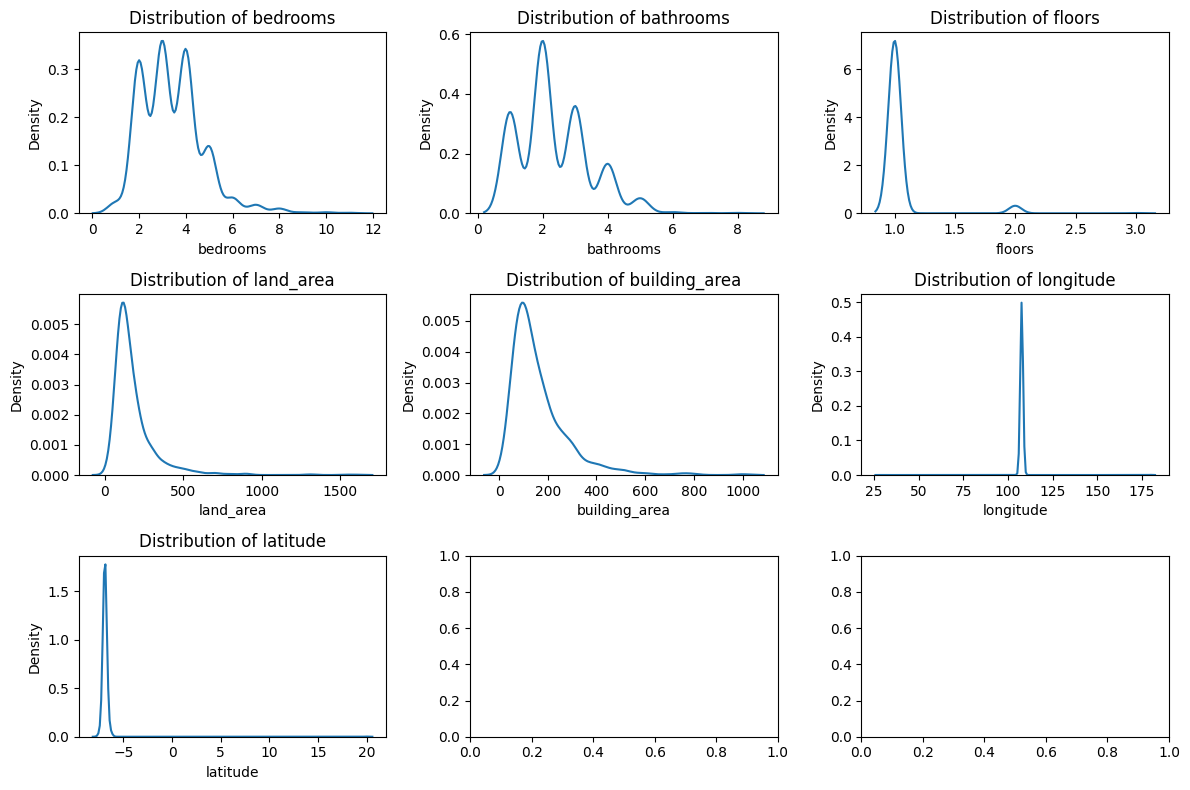

In [60]:
# Plot histogram (JUST RUN THE CODE)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_dropped.columns):
    sns.kdeplot(X_train_dropped[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

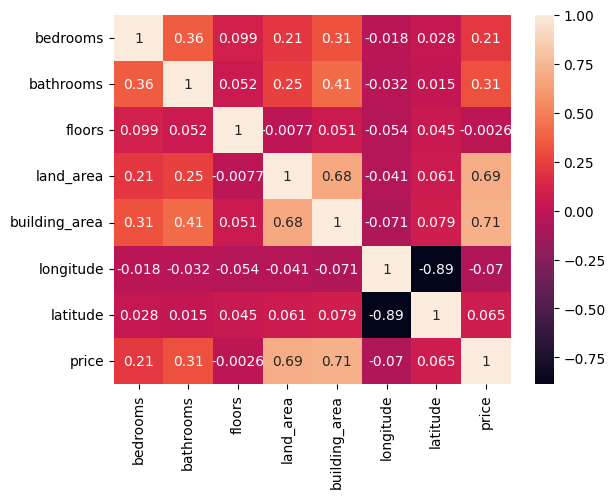

In [61]:
# Yang candra pny
#Create a heatmap (JUST RUN THE CODE)
corr = train_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

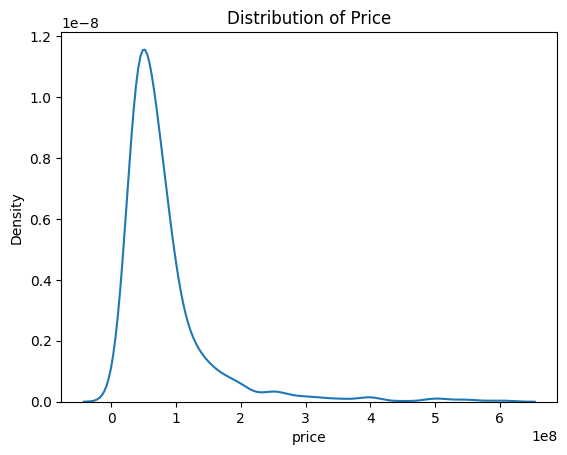

In [62]:
# Visualize price distribution (JUST RUN THE CODE)
sns.kdeplot(y_train_dropped)
plt.title(f'Distribution of Price')
plt.show()

#### 2.4. Create Imputation (3 pts)
---

- Now, let's perform a numerical imputation (because all features are numerical)
- First check the missing value of the numerical data

In [63]:
# Check missing value (JUST RUN THE CODE)
X_train_dropped.isna().sum(0)

bedrooms         50
bathrooms        51
floors           55
land_area        64
building_area    55
longitude        30
latitude         30
dtype: int64

In [64]:
X_train_dropped.shape

(1182, 7)

- Create a function to fit a numerical features imputer

In [65]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
def num_imputer_fit(data):
    """
    Function for imputed data numerical

    has 1 parameter : 
    1. data -> X_train_dropped
    """

    imputer_fit_numerical = SimpleImputer(missing_values = np.nan,
                                strategy = 'median')
    
    # fit the imputer into dataset
    imputer_fit_numerical.fit(data)

    return imputer_fit_numerical

def num_imputer_transform(imputer_fit_numerical, data):
    """  
    Function for transform imputed missing value data

    has 2 parameter:
    1. imputer_fit_numerical
    2. data -> X_train_dropped
    """
    # begin the transform
    imputed_data = imputer_fit_numerical.transform(data)

    # After success Transform, then make it to a Dataframe Format
    X_train_num_imputed = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)

    return X_train_num_imputed


- Perform imputation

In [66]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_dropped)

# Transform the data
X_train_imputed = num_imputer_transform(num_imputer, X_train_dropped)

In [67]:
# Validate (JUST RUN THE CODE)
X_train_imputed.isna().sum(0)

bedrooms         0
bathrooms        0
floors           0
land_area        0
building_area    0
longitude        0
latitude         0
dtype: int64

Great!

#### 2.5. Feature engineering the data (3 pts)
---

- We standardize the data so that it can perform well during model optimization (4 pts)

In [68]:
from sklearn.preprocessing import StandardScaler


In [69]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
def fit_scaler(data):
    """ 
    Fit a StandardScaler to the data.

    Parameters:
    - data: The input data (pd.DataFrame).

    Returns:
    - scaler: The fitted StandardScaler object.
    """
    # Scaler
    scaler = StandardScaler()
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """  
    Function for applying Scaler into the data.
    Currently this function using StandardScaler.

    has 2 parameter:
    1. data -> the dataset (X_train_imputed)
    2. scaler -> function fit_scaler (Standard Scaler)
    """
    scaled_data = scaler.transform(data)

    return pd.DataFrame(scaled_data, columns = data.columns, index = data.index)

In [70]:
# Fit the scaler
scaler = fit_scaler(X_train_imputed)

# Transform the scaler
X_train_clean = transform_scaler(data = X_train_imputed, scaler = scaler)

In [81]:
# Candra
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1182.0000,1182.0000,1182.0000,1182.0000,1182.0000,1182.0000,1182.0000
mean,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-1.8481,-1.2580,-0.2041,-1.0620,-1.1835,-25.3843,-0.8628
25%,-1.0754,-0.3193,-0.2041,-0.5277,-0.6176,-0.0039,-0.0898
50%,-0.3027,-0.3193,-0.2041,-0.3069,-0.3042,0.0078,-0.0524
75%,0.4700,0.6195,-0.2041,0.1490,0.3400,0.0140,0.0077
max,5.8790,5.3132,9.2587,10.1219,7.3047,23.0901,33.9101


Great!

#### 2.6. Create the preprocess function (4 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [98]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_imputer, the numerical imputer, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.4 - 2.5
# - You return the clean data
#
# Write your code here
####################################################
def preprocess_data(data, num_imputer, scaler):
    """ 
    This function for preprocessing data starting from:
    - imputing numerical
    - scaling

    has 3 parameter:
    1. data = X_train_dropped (Data that have been cleansed)
    2. num_imputer = the function for imputing numerical
    3. scaler = the function for scaling with StandardScaler.

    Candra Kurniawan | Pacmann AI 2024.
    """
    # 
    # Note from mas Cahya only fit the imputer with X_train_dropped set
    # for not making Data Leakage
    num_imputer_trigger = num_imputer(X_train_dropped)
    numerical_data_imputed = num_imputer_transform(num_imputer_trigger, data)

    # 2.5 Scaling the data with StandardScaler
    standard_scaler = scaler(X_train_dropped)
    X_data_scaled = transform_scaler(data = numerical_data_imputed, scaler = standard_scaler)

    return X_data_scaled


In [99]:
# Preprocess the data training again
X_train_clean = preprocess_data(data = X_train_dropped, num_imputer = num_imputer_fit, scaler = fit_scaler)

In [100]:
# Validate (JUST RUN THE CODE)
X_train_clean.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,-1.067640,-0.327141,-0.209284,-0.385863,-0.533743,-0.068002,0.068518
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,-1.825364,-1.247532,-0.209284,0.128190,-1.070511,0.013157,-0.020740
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,0.447807,1.513640,-0.209284,-0.260823,0.318268,0.007874,-0.097398
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,3.478700,1.513640,-0.209284,1.170191,2.448298,0.008869,0.080974
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,0.447807,1.513640,-0.209284,0.822858,2.022292,0.004499,-0.100319


In [93]:
X_train_clean.shape

(1182, 7)

In [101]:
# Transform other set of data
X_valid_clean = preprocess_data(data = X_valid, num_imputer = num_imputer_fit, scaler = fit_scaler)

X_test_clean = preprocess_data(data = X_test, num_imputer = num_imputer_fit, scaler = fit_scaler)

print(f"Original data shape (X_valid): {X_valid.shape}")
print(f"Cleaned data shape (X_valid_clean): {X_valid_clean.shape}")
print(" ")
print(f"Original data shape (X_test): {X_test.shape}")
print(f"Cleaned data shape (X_test_clean): {X_test_clean.shape}")

Original data shape (X_valid): (149, 7)
Cleaned data shape (X_valid_clean): (149, 7)
 
Original data shape (X_test): (149, 7)
Cleaned data shape (X_test_clean): (149, 7)


In [102]:
X_test_clean.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,-0.035306,0.000246,-0.178245,0.013081,0.075874,-0.216609,0.043611
std,0.894882,0.889228,1.567101,1.228300,1.292622,2.750738,0.821582
min,-1.825364,-1.247532,-4.834044,-0.983277,-1.079031,-33.560569,-0.608675
25%,-1.067640,-0.327141,-0.209284,-0.566477,-0.644505,-0.003199,-0.089961
50%,-0.309917,-0.327141,-0.209284,-0.371970,-0.320740,0.008511,-0.050347
75%,0.447807,0.593249,-0.209284,0.128190,0.318268,0.020458,0.038549
max,2.720977,3.354420,9.040236,10.409266,5.430339,0.249537,9.810965


In [103]:
X_valid_clean.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.071487,0.129965,-0.209284,-0.060675,-0.064565,-0.672607,0.154648
std,1.062947,1.040776,1.316888,0.839504,0.965927,4.730618,1.396496
min,-1.825364,-1.247532,-4.834044,-0.886024,-1.079031,-33.560569,-0.608675
25%,-1.067640,-0.327141,-0.209284,-0.531744,-0.584864,-0.006473,-0.095918
50%,-0.309917,-0.327141,-0.209284,-0.316397,-0.320740,0.004499,-0.057771
75%,0.447807,0.593249,-0.209284,0.114297,0.062665,0.016591,0.006098
max,4.994147,3.354420,4.415476,5.685529,5.430339,0.249537,9.810965


### 3. Training Machine Learning Models (43 pts)
---

```
3.1 Prepare model evaluation function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare model evaluation function (10 pts)
---

- Before modeling, let's prepare two functions
  - `extract_cv_results`: to return the score and best param from hyperparameter search
  - `evaluate_model`: to return the RMSE of a model

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [113]:
####################################################
# First, create a function to extract the CV results
# - The function name is extract_cv_results
# - It needs one input, called by `cv_obj` (a GridSearchCV sklearn object)
# - It returns three output:
#   1. the CV score on train set (float)
#   2. the CV score on valid set (float)
#   3. The best params (dictionary)
#
#
# Next, create a function to evaluate model called `rmse`
# - It needs 2 input
#   - y_actual, the actual output (pd.DataFrame or numpy array)
#   - y_pred, the predicted output (pd.DataFrame or numpy array)
# - You calculate the model performance using root mean squared error metrics
# - Then return the rmse
#
# Write your code here
####################################################

def extract_cv_results(cv_obj:GridSearchCV):
    """ 
    This function extracts the cross-validation (CV) results from a GridSearchCV Object.

    Parameters:
    cv_obj (GridSearchCV object): The GridSearchCV object

    Returns:
    float: the CV Score on the training set
    float: the CV score on the validation set
    dict: the best parameters

    """
    
    # The mean training score (across folds)
    train_score = -cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]

    # The score on the validation set
    valid_score = -cv_obj.cv_results_['mean_test_score'][cv_obj.best_index_]

    # The best parameters
    best_params = cv_obj.best_params_

    return train_score, valid_score, best_params

def rmse(y_actual: pd.DataFrame, y_pred: pd.DataFrame):
    """  
    This function calculates the RMSE between the actial
    and predicted outputs.

    Parameters:
    -> y_actual (numpy array or pd.DataFrame): the actual output
    -> y_pred (numpy array or pd.DataFrame): the predicted output

    Returns:
    float: The RMSE between the actual and predicted outputs

    """

    return np.sqrt(mean_squared_error(y_actual, y_pred))


#### 3.2. Train and Cross Validate Several Models (23 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model (**3 pts**)
  2. k-NN (**3 pts**)
  3. Linear Regression (**4 pts**)
  4. Decision Tree (**4 pts**)
  5. Ridge (**4 pts**)
  6. Lasso (**4 pts**)

- We're going to perform a `GridSearchCV`, with
  - number of CV = 10
  - scoring = root mean squared error
  - return the train score

In [114]:
####################################################
# Import sklearn library of those six models + gridsearchcv
# Write your code here
# This is 1 pts
####################################################

from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor


---
##### Perform CV for baseline model (3 pts)
- Return as `reg_base`

In [115]:
####################################################
# Perform GridSearchCV for Baseline model
# return the results as reg_base
# Write your code here
####################################################
reg_base = GridSearchCV(estimator=DummyRegressor(),
                        param_grid={},
                        cv=10,
                        scoring='neg_root_mean_squared_error',
                        return_train_score=True)

reg_base.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=DummyRegressor(), param_grid={},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [116]:
# Validate the CV Score (JUST RUN THE CODE)
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base/(10**6):.2f} Juta')
print(f'Valid score - Baseline model: {valid_base/(10**6):.2f} Juta')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 73.73 Juta
Valid score - Baseline model: 72.55 Juta
Best Params - Baseline model: {}


---
##### Perform CV for k-NN Model (3 pts)
- Do a parameter search for `k = {1, 10, 25, 50, 100, 150, 200, 250}`
- Return as `reg_knn`

In [125]:
####################################################
# Perform GridSearchCV for kNN model
# return the results as reg_knn
# Write your code here
####################################################
reg_knn = GridSearchCV(estimator=KNeighborsRegressor(),
                       param_grid={'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]},
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_knn.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [126]:
# Execute by Candra
# Validate the CV Score (JUST RUN THE CODE)
train_knn, valid_knn, best_param_knn = extract_cv_results(reg_knn)

print(f'Train score - kNN model: {train_knn/(10**6):.2f} Juta')
print(f'Valid score - kNN model: {valid_knn/(10**6):.2f} Juta')
print(f'Best Params - kNN model: {best_param_knn}')

Train score - kNN model: 46.20 Juta
Valid score - kNN model: 50.90 Juta
Best Params - kNN model: {'n_neighbors': 10}


In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_knn, valid_knn, best_param_knn = extract_cv_results(reg_knn)

print(f'Train score - kNN model: {train_knn/(10**6):.2f} Juta')
print(f'Valid score - kNN model: {valid_knn/(10**6):.2f} Juta')
print(f'Best Params - kNN model: {best_param_knn}')

Train score - kNN model: 49.96 Juta
Valid score - kNN model: 51.42 Juta
Best Params - kNN model: {'n_neighbors': 25}


---
##### Perform CV for Linear Regression Model (4 pts)
- Return as `reg_lr`

In [127]:
####################################################
# Perform GridSearchCV for Linear Regression model
# return the results as reg_lr
# Write your code here
####################################################
reg_lr = GridSearchCV(estimator=LinearRegression(),
                       param_grid={},
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_lr.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [129]:
# Validate the CV Score (JUST RUN THE CODE)
train_lr, valid_lr, best_param_lr = extract_cv_results(reg_lr)

print(f'Train score - LinReg model: {train_lr/(10**6):.2f} Juta')
print(f'Valid score - LinReg model: {valid_lr/(10**6):.2f} Juta')
print(f'Best Params - LinReg model: {best_param_lr}')

Train score - LinReg model: 47.83 Juta
Valid score - LinReg model: 48.18 Juta
Best Params - LinReg model: {}


---
##### Perform CV for Decision Tree Model (4 pts)
- You search the best hyperparameter from
  - maximum depth : 2, 10, 30, 100, None
  - minimum samples required to split : 2, 25, 50, 100, 150
  - minimum samples at leaf : 2, 5, 10, 20
- Return as `reg_dt`

In [130]:
####################################################
# Perform GridSearchCV for Decision Tree model
# return the results as reg_dt
# Write your code here
####################################################

reg_dt = GridSearchCV(estimator=DecisionTreeRegressor(),
                       param_grid={'max_depth': [2, 10, 30, 100, None],
                                   'min_samples_leaf': [2, 5, 10, 20],
                                   'min_samples_split': [2, 25, 50, 100, 150]},
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_dt.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 10, 30, 100, None],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 25, 50, 100, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [132]:
# Validate the CV Score (JUST RUN THE CODE)
train_dt, valid_dt, best_param_dt = extract_cv_results(reg_dt)

print(f'Train score - Decision Tree model: {train_dt/(10**6):.2f} Juta')
print(f'Valid score - Decision Tree model: {valid_dt/(10**6):.2f} Juta')
print(f'Best Params - Decision Tree model: {best_param_dt}')

Train score - Decision Tree model: 42.45 Juta
Valid score - Decision Tree model: 49.82 Juta
Best Params - Decision Tree model: {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 50}


---
##### Perform CV for Ridge Model (4 pts)
- You search the best hyperparameter from
  - regularization strength: [$10^{-6}$, ..., $10^{10}$],
- Return as `reg_ridge`

In [134]:
alphas = np.logspace(-6, 10, num=21)
alphas

array([1.00000000e-06, 6.30957344e-06, 3.98107171e-05, 2.51188643e-04,
       1.58489319e-03, 1.00000000e-02, 6.30957344e-02, 3.98107171e-01,
       2.51188643e+00, 1.58489319e+01, 1.00000000e+02, 6.30957344e+02,
       3.98107171e+03, 2.51188643e+04, 1.58489319e+05, 1.00000000e+06,
       6.30957344e+06, 3.98107171e+07, 2.51188643e+08, 1.58489319e+09,
       1.00000000e+10])

In [140]:
####################################################
# Perform GridSearchCV for Ridge model
# return the results as reg_ridge
# Write your code here
####################################################

# Create the array for the hyperparameter
alphas = np.logspace(-6, 10, num=21)

reg_ridge = GridSearchCV(estimator=Ridge(),
                       param_grid={'alpha': alphas},
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_ridge.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 6.30957344e-06, 3.98107171e-05, 2.51188643e-04,
       1.58489319e-03, 1.00000000e-02, 6.30957344e-02, 3.98107171e-01,
       2.51188643e+00, 1.58489319e+01, 1.00000000e+02, 6.30957344e+02,
       3.98107171e+03, 2.51188643e+04, 1.58489319e+05, 1.00000000e+06,
       6.30957344e+06, 3.98107171e+07, 2.51188643e+08, 1.58489319e+09,
       1.00000000e+10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [142]:
# candra
# Validate the CV Score (JUST RUN THE CODE)
train_ridge, valid_ridge, best_param_ridge = extract_cv_results(reg_ridge)

print(f'Train score - Ridge model: {train_ridge/(10**6):.2f} Juta')
print(f'Valid score - Ridge model: {valid_ridge/(10**6):.2f} Juta')
print(f'Best Params - Ridge model: {best_param_ridge}')

Train score - Ridge model: 47.83 Juta
Valid score - Ridge model: 48.15 Juta
Best Params - Ridge model: {'alpha': 15.848931924611142}


In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_ridge, valid_ridge, best_param_ridge = extract_cv_results(reg_ridge)

print(f'Train score - Ridge model: {train_ridge/(10**6):.2f} Juta')
print(f'Valid score - Ridge model: {valid_ridge/(10**6):.2f} Juta')
print(f'Best Params - Ridge model: {best_param_ridge}')

Train score - Ridge model: 47.90 Juta
Valid score - Ridge model: 48.27 Juta
Best Params - Ridge model: {'alpha': 100.0}


---
##### Perform CV for Lasso Model (4 pts)
- You search the best hyperparameter from
  - regularization strength: [$10^{-6}$, ..., $10^{10}$]
- Return as `reg_lasso`

In [143]:
####################################################
# Perform GridSearchCV for Lasso model
# return the results as reg_lasso
# Write your code here
####################################################

reg_lasso = GridSearchCV(estimator=Lasso(),
                       param_grid={'alpha': alphas},
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_lasso.fit(X_train_clean, y_train_dropped)

/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+18, tolerance: 6.010e+14
  model = cd_fast.enet_coordinate_descent(
/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+18, tolerance: 6.010e+14
  model = cd_fast.enet_coordinate_descent(
/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 6.30957344e-06, 3.98107171e-05, 2.51188643e-04,
       1.58489319e-03, 1.00000000e-02, 6.30957344e-02, 3.98107171e-01,
       2.51188643e+00, 1.58489319e+01, 1.00000000e+02, 6.30957344e+02,
       3.98107171e+03, 2.51188643e+04, 1.58489319e+05, 1.00000000e+06,
       6.30957344e+06, 3.98107171e+07, 2.51188643e+08, 1.58489319e+09,
       1.00000000e+10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [144]:
# Candra
# Validate the CV Score (JUST RUN THE CODE)
train_lasso, valid_lasso, best_param_lasso = extract_cv_results(reg_lasso)

print(f'Train score - Lasso model: {train_lasso/(10**6):.2f} Juta')
print(f'Valid score - Lasso model: {valid_lasso/(10**6):.2f} Juta')
print(f'Best Params - Lasso model: {best_param_lasso}')

Train score - Lasso model: 47.83 Juta
Valid score - Lasso model: 48.17 Juta
Best Params - Lasso model: {'alpha': 25118.864315095823}


In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_lasso, valid_lasso, best_param_lasso = extract_cv_results(reg_lasso)

print(f'Train score - Lasso model: {train_lasso/(10**6):.2f} Juta')
print(f'Valid score - Lasso model: {valid_lasso/(10**6):.2f} Juta')
print(f'Best Params - Lasso model: {best_param_lasso}')

Train score - Lasso model: 47.86 Juta
Valid score - Lasso model: 48.25 Juta
Best Params - Lasso model: {'alpha': 1000000.0}


#### 3.3. Choose the best model (10 pts)
---

Lets summarize the model

In [145]:
# Candra

# Summarize (JUST RUN THE CODE)
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'kNN', 'Linear Regression', 'Decision Tree', 'Ridge', 'Lasso'],
        'train_score': [train_base, train_knn, train_lr, train_dt, train_ridge, train_lasso],
        'valid_score': [valid_base, valid_knn, valid_lr, valid_dt, valid_ridge, valid_lasso],
        'best_params': [best_param_base, best_param_knn, best_param_lr, best_param_dt, best_param_ridge, best_param_lasso]
    }
)

summary_df['train_score'] /= 10**6
summary_df['valid_score'] /= 10**6
summary_df

,model,train_score,valid_score,best_params
0,Baseline,73.727098,72.553647,{}
1,kNN,46.201897,50.898951,{'n_neighbors': 10}
2,Linear Regression,47.826243,48.177845,{}
3,Decision Tree,42.448198,49.824825,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_..."
4,Ridge,47.830157,48.153189,{'alpha': 15.848931924611142}
5,Lasso,47.826364,48.169793,{'alpha': 25118.864315095823}


In [ ]:
# Summarize (JUST RUN THE CODE)
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'kNN', 'Linear Regression', 'Decision Tree', 'Ridge', 'Lasso'],
        'train_score': [train_base, train_knn, train_lr, train_dt, train_ridge, train_lasso],
        'valid_score': [valid_base, valid_knn, valid_lr, valid_dt, valid_ridge, valid_lasso],
        'best_params': [best_param_base, best_param_knn, best_param_lr, best_param_dt, best_param_ridge, best_param_lasso]
    }
)

summary_df['train_score'] /= 10**6
summary_df['valid_score'] /= 10**6
summary_df

,model,train_score,valid_score,best_params
0,Baseline,73.727098,72.553647,{}
1,kNN,49.958100,51.417603,{'n_neighbors': 25}
2,Linear Regression,47.788977,48.297700,{}
3,Decision Tree,42.495549,50.039227,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_..."
4,Ridge,47.904720,48.266830,{'alpha': 100.0}
5,Lasso,47.860353,48.251934,{'alpha': 1000000.0}


From the previous results, which one is the best model? (3 pts)

```
Answer in this section (you can use bahasa)

The best model is the Ridge() model with alpha: 100,0
```

Why do you choose that model? (3 pts)

```
Explain your answer in here (you can use bahasa)
Because it given the lowest validation_score = 48.266

```

And, create a `reg_best` to store the best model

In [146]:
#####################################################################
# Recreate or retrain your best regression model
# Set is as reg_best
# Write your code in here (4 pts)
#####################################################################
reg_best = reg_ridge.best_estimator_

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train & valid data
---

In [147]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

In [148]:
# Run by candra

# Find error (JUST RUN THE CODE)
train_error = rmse(y_train_dropped, y_train_pred)
print(f'RMSE on Train data: {train_error/10**6:.2f} Juta')

RMSE on Train data: 47.89 Juta


In [ ]:
# Find error (JUST RUN THE CODE)
train_error = rmse(y_train_dropped, y_train_pred)
print(f'RMSE on Train data: {train_error/10**6:.2f} Juta')

RMSE on Train data: 47.94 Juta


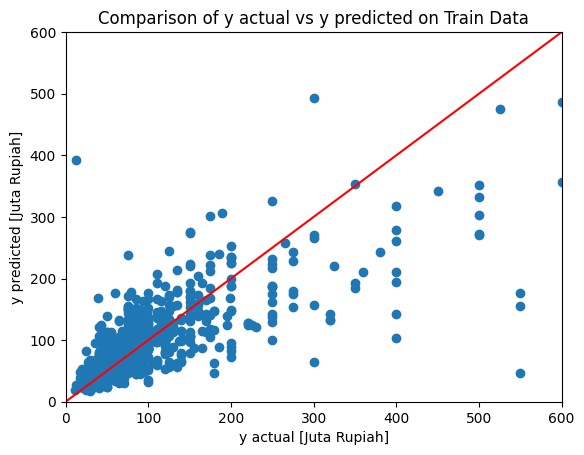

In [149]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train_dropped/1e6, y_train_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

In [150]:
# Predict (JUST RUN THE CODE)
y_valid_pred = reg_best.predict(X_valid_clean)

In [151]:
# Run by candra

# Find error (JUST RUN THE CODE)
valid_error = rmse(y_valid, y_valid_pred)
print(f'RMSE on Valid data: {valid_error/10**6:.2f} Juta')

RMSE on Valid data: 34.71 Juta


In [ ]:
# Find error (JUST RUN THE CODE)
valid_error = rmse(y_valid, y_valid_pred)
print(f'RMSE on Valid data: {valid_error/10**6:.2f} Juta')

RMSE on Valid data: 135.26 Juta


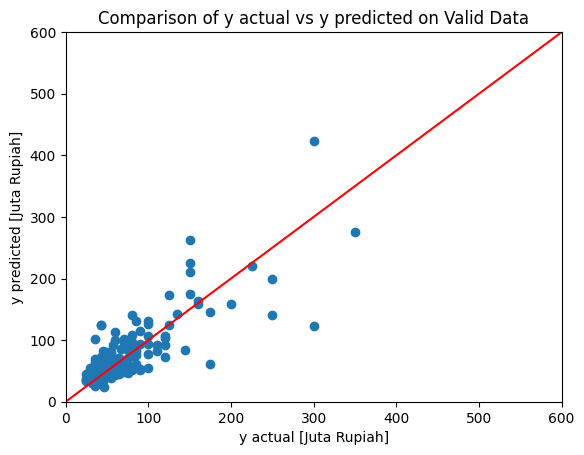

In [153]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_valid/1e6, y_valid_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Valid Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [154]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

In [155]:
# Run by candra

# Final generalization
test_error = rmse(y_test, y_test_pred)
print(f'RMSE on Test data: {test_error/10**6:.2f} Juta')

RMSE on Test data: 44.15 Juta


In [ ]:
# Final generalization
test_error = rmse(y_test, y_test_pred)
print(f'RMSE on Test data: {test_error/10**6:.2f} Juta')

RMSE on Test data: 89.56 Juta


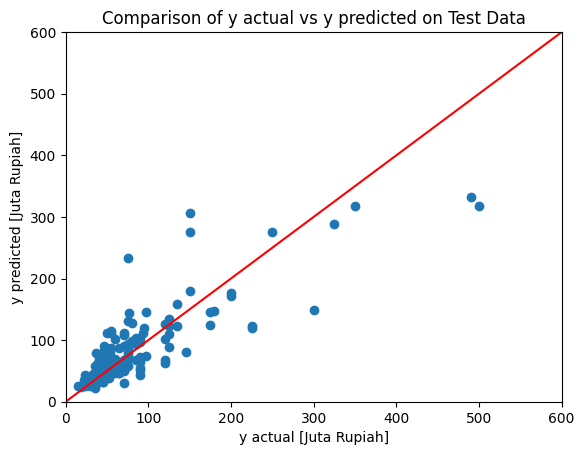

In [156]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test/1e6, y_test_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()

### 5. Explore and generate a better model! (30)
---

- Please explore by yourself!
- Your **task** is to create a better model from the previous results.

Train with Support Vector Regressor

In [ ]:
from sklearn.model_selection import SVR

In [161]:
#########################################
# Write your code here
# Feel free to explore
#########################################

# I train with Support Vector Regression (SVR)
# Random Forest Regression
# Gradient Boosting Regression

reg_svr = GridSearchCV(estimator=SVR(),
                       param_grid={},
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_svr.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=SVR(), param_grid={}, return_train_score=True,
             scoring='neg_root_mean_squared_error')

In [162]:
# Validate the CV Score (JUST RUN THE CODE)
train_svr, valid_svr, best_param_svr = extract_cv_results(reg_svr)

print(f'Train score - SVR model: {train_svr/(10**6):.2f} Juta')
print(f'Valid score - SVR Tree model: {valid_svr/(10**6):.2f} Juta')
print(f'Best Params - SVR Tree model: {best_param_svr}')

Train score - SVR model: 77.10 Juta
Valid score - SVR Tree model: 75.82 Juta
Best Params - SVR Tree model: {}


Random Forest Regressor


In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
reg_rfg  = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid={'n_estimators': [100, 200],  # Number of trees in the forest
                                   'max_depth': [None, 10,],    # Maximum depth of the tree
                                   'min_samples_split': [2, 5],    # Minimum number of samples required to split a node
                                   'min_samples_leaf': [1, 2]},      # Minimum number of samples required at each leaf node
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       return_train_score=True)

reg_rfg.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [168]:
# Validate the CV Score (JUST RUN THE CODE)
train_rfg, valid_rfg, best_param_rfg = extract_cv_results(reg_rfg)

print(f'Train score - RandomForestRegressor model: {train_rfg/(10**6):.2f} Juta')
print(f'Valid score - RandomForestRegressor Tree model: {valid_rfg/(10**6):.2f} Juta')
print(f'Best Params - RandomForestRegressor Tree model: {best_param_rfg}')

Train score - RandomForestRegressor model: 25.15 Juta
Valid score - RandomForestRegressor Tree model: 46.48 Juta
Best Params - RandomForestRegressor Tree model: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Gradient Boosting Regression

In [169]:
from sklearn.ensemble import GradientBoostingRegressor

In [170]:
# Create the GridSearchCV object with the parameter grid
reg_gb = GridSearchCV(estimator=GradientBoostingRegressor(),
                      param_grid={'learning_rate': [0.01, 0.1, 0.5],
                                  'n_estimators': [50, 100, 200],
                                  'max_depth': [3, 5, 7],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4]},
                      cv=10,
                      scoring='neg_root_mean_squared_error',
                      return_train_score=True)

# Fit the GridSearchCV object to the training data
reg_gb.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [172]:
# Validate the CV Score (JUST RUN THE CODE)
train_gb, valid_gb, best_param_gb = extract_cv_results(reg_gb)

print(f'Train score - Gradient Boosting Regression model: {train_gb/(10**6):.2f} Juta')
print(f'Valid score - Gradient Boosting Regression Tree model: {valid_gb/(10**6):.2f} Juta')
print(f'Best Params - Gradient Boosting Regression Tree model: {best_param_gb}')

Train score - Gradient Boosting Regression model: 21.81 Juta
Valid score - Gradient Boosting Regression Tree model: 47.74 Juta
Best Params - Gradient Boosting Regression Tree model: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Summarize which one the best Other Model

In [173]:
# Candra

# Summarize (JUST RUN THE CODE)
summary_df = pd.DataFrame(
    data={
        'model': ['Support Vector Regressor', 'Random Forest Regressor', 'Gradient Boosting Regression'],
        'train_score': [train_svr, train_rfg, train_gb, ],
        'valid_score': [valid_svr, valid_rfg, valid_gb, ],
        'best_params': [best_param_svr, best_param_rfg, best_param_gb, ]
    }
)

summary_df['train_score'] /= 10**6
summary_df['valid_score'] /= 10**6
summary_df

,model,train_score,valid_score,best_params
0,Support Vector Regressor,77.097381,75.819760,{}
1,Random Forest Regressor,25.154142,46.479585,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
2,Gradient Boosting Regression,21.810791,47.741873,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa..."


From the previous results, which one is the best model? (3 pts)

```
Answer in this section (you can use bahasa)

The best model After Researching other Method:
i think the best model is the RandomForestRegressor() model with parameter grid max_depth: None, min_samples_leaf = 2, etc..
```

Why do you choose that model? (3 pts)

```
Explain your answer in here (you can use bahasa)
Because it given the lowest validation_score = 46.479

```

And, create a `reg_best` Again to store the best model

In [174]:
reg_best_new = reg_rfg.best_estimator_

In [175]:
# Predict (JUST RUN THE CODE)
y_train_pred_new = reg_best_new.predict(X_train_clean)

In [176]:
# Run by candra

# Find error (JUST RUN THE CODE)
train_error_new = rmse(y_train_dropped, y_train_pred_new)
print(f'RMSE on Train data: {train_error_new/10**6:.2f} Juta')

RMSE on Train data: 25.35 Juta


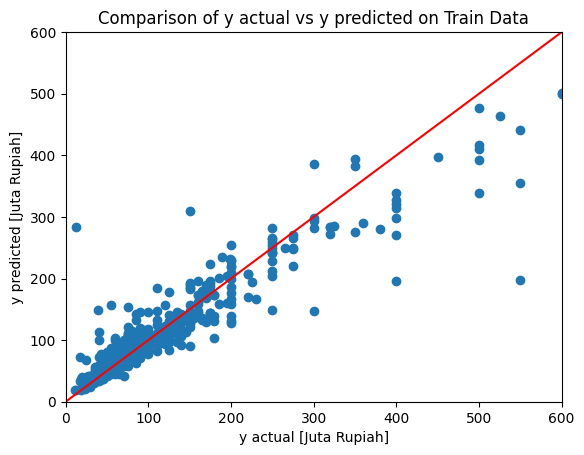

In [177]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train_dropped/1e6, y_train_pred_new/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

In [178]:
# Predict (JUST RUN THE CODE)
y_valid_pred_new = reg_best_new.predict(X_valid_clean)

In [179]:
# Run by candra

# Find error (JUST RUN THE CODE)
valid_error_new = rmse(y_valid, y_valid_pred_new)
print(f'RMSE on Valid data: {valid_error_new/10**6:.2f} Juta')

RMSE on Valid data: 37.63 Juta


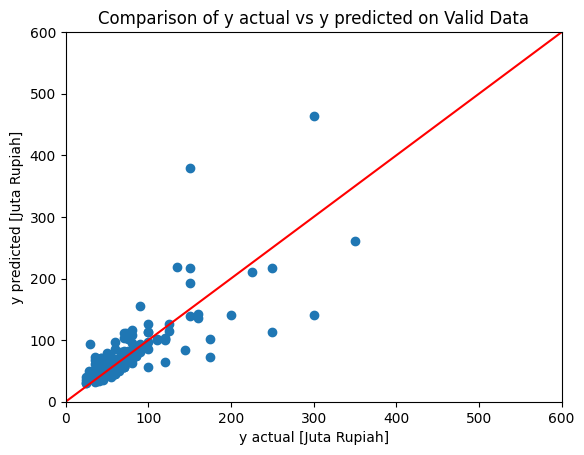

In [180]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_valid/1e6, y_valid_pred_new/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Valid Data')
plt.show()

PREDICT & Evaluate on Test Data [New]

In [181]:
# Predict (JUST RUN THE CODE)
y_test_pred_new = reg_best_new.predict(X_test_clean)

In [182]:
# Run by candra

# Final generalization
test_error_new = rmse(y_test, y_test_pred_new)
print(f'RMSE on Test data: {test_error_new/10**6:.2f} Juta')

RMSE on Test data: 44.97 Juta


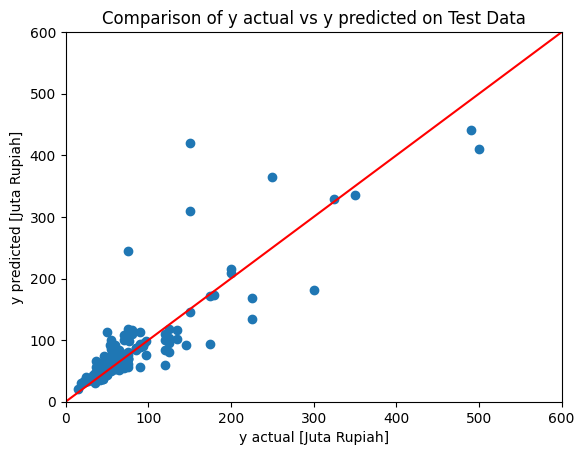

In [183]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test/1e6, y_test_pred_new/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()